In [ ]:
using Pkg

#Pkg.add("Plots")
#Pkg.add("NLsolve")
#Pkg.add("ForwardDiff")
#Pkg.add("DifferentialEquations")
#Pkg.add("LinearAlgebra")
#Pkg.add("Printf")
#Pkg.add("Pickle")
#Pkg.add("PythonCall")
#Pkg.add("Plots")
#Pkg.add("CondaPkg")          

#CondaPkg.add("numpy")
#CondaPkg.add("sympy")

# Packages using
using Plots, NLsolve, ForwardDiff, DifferentialEquations, LinearAlgebra, Printf, Pickle,PythonCall, CondaPkg



In [ ]:
t0 = 0.0;
tf = 3.0;
x0 = [0.0, 0.0, 0.0, 0.0];

In [ ]:
# control-Hamiltonian function
function Ham(x, λ, t, u) 
   return λ[1]*x[3] + λ[2]*x[4] + λ[3]*(-6020.0*u/(8100.0*cos(x[2])^2 - 114380.0) - 13545.0*x[4]^2*sin(x[2])/(8100.0*cos(x[2])^2 - 114380.0) - 79461.0*sin(x[2])*cos(x[2])/(8100.0*cos(x[2])^2 - 114380.0)) + λ[4]*(900.0*cos(x[2])*u/(2025.0*cos(x[2])^2 - 28595.0) + 2025.0*x[4]^2*sin(x[2])*cos(x[2])/(2025.0*cos(x[2])^2 - 28595.0) + 167751.0*sin(x[2])/(2025.0*cos(x[2])^2 - 28595.0)) - 0.00026*u^2
end

# State-adjoint system
function hvfun(x, λ)
    h = zeros(eltype(x), 8)
    h[1:8] = [x[3],x[4], (-9.810000002*sin(x[2])*cos(x[2])^3 - 1.672222222*x[4]^2*sin(x[2])*cos(x[2])^2 + (-635.2221169*λ[4] + 138.5268889*sin(x[2]))*cos(x[2]) + 1062.232540*λ[3] + 23.61342936*x[4]^2*sin(x[2]))/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) + 1062.232540*λ[3]/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) - 635.2221168*λ[4]*cos(x[2])/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) + (1.041923077*10^8*λ[4]*cos(x[2]) - 1.742326923*10^8*λ[3])/(405.0*cos(x[2])^2 - 5719.)^2, -635.2221169*λ[3]*cos(x[2])/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) + (1.730769231*10^6*cos(x[2])*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])/(405.0*cos(x[2])^2 - 5719.) + 2025.0*x[4]^2*sin(x[2])*cos(x[2]) + 167751.0*sin(x[2]))/(2025.0*cos(x[2])^2 - 28595.0) + 379.8670466*λ[4]*cos(x[2])^2/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) + (-6.230769230*10^7*λ[4]*cos(x[2])^2 + 1.041923077*10^8*λ[3]*cos(x[2]))/(405.0*cos(x[2])^2 - 5719.)^2, 0.0, -3.048315806*10^(-7)*λ[3]*(2.083846154*10^9*λ[4]*sin(x[2]) - 5.4857250*10^6*x[4]^2*cos(x[2])^3 + 1.09714500*10^7*x[4]^2*cos(x[2])*sin(x[2])^2 + 7.74638550*10^7*x[4]^2*cos(x[2]) - 3.21817050*10^7*cos(x[2])^4 + 9.65451150*10^7*sin(x[2])^2*cos(x[2])^2 + 4.544374590*10^8*cos(x[2])^2 - 4.544374590*10^8*sin(x[2])^2)/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) - 6.096631612*10^(-7)*λ[3]*(-2.083846154*10^9*λ[4]*cos(x[2]) + 3.484653847*10^9*λ[3] - 5.4857250*10^6*x[4]^2*sin(x[2])*cos(x[2])^2 + 7.74638550*10^7*x[4]^2*sin(x[2]) - 3.21817050*10^7*sin(x[2])*cos(x[2])^3 + 4.544374590*10^8*sin(x[2])*cos(x[2]))*sin(x[2])/((cos(x[2]) + 3.757790262)^3*(cos(x[2]) - 3.757790262)^2) - 6.096631612*10^(-7)*λ[3]*(-2.083846154*10^9*λ[4]*cos(x[2]) + 3.484653847*10^9*λ[3] - 5.4857250*10^6*x[4]^2*sin(x[2])*cos(x[2])^2 + 7.74638550*10^7*x[4]^2*sin(x[2]) - 3.21817050*10^7*sin(x[2])*cos(x[2])^3 + 4.544374590*10^8*sin(x[2])*cos(x[2]))*sin(x[2])/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^3) - 4050.0*λ[4]*(1.730769231*10^6*cos(x[2])*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])/(405.0*cos(x[2])^2 - 5719.) + 2025.0*x[4]^2*sin(x[2])*cos(x[2]) + 167751.0*sin(x[2]))*sin(x[2])*cos(x[2])/(2025.0*cos(x[2])^2 - 28595.0)^2 - λ[4]*(-1.730769231*10^6*sin(x[2])*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])/(405.0*cos(x[2])^2 - 5719.) - 3.115384616*10^8*cos(x[2])*λ[4]*sin(x[2])/(405.0*cos(x[2])^2 - 5719.) + 1.401923077*10^9*cos(x[2])^2*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])*sin(x[2])/(405.0*cos(x[2])^2 - 5719.)^2 + 2025.0*x[4]^2*cos(x[2])^2 - 2025.0*x[4]^2*sin(x[2])^2 + 167751.0*cos(x[2]))/(2025.0*cos(x[2])^2 - 28595.0) - 346153.8461*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])*λ[4]*sin(x[2])/(405.0*cos(x[2])^2 - 5719.)^2 + 1.557692308*10^6*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])^2*sin(x[2])*cos(x[2])/(405.0*cos(x[2])^2 - 5719.)^3, -λ[1], -λ[2] + λ[3]*x[4]*sin(x[2])*(-47.22685872 + 3.344444445*cos(x[2])^2)/((cos(x[2]) + 3.757790262)^2*(cos(x[2]) - 3.757790262)^2) - 4050.0*λ[4]*x[4]*sin(x[2])*cos(x[2])/(2025.0*cos(x[2])^2 - 28595.0)] 
    return h
end

# control as a function of state and adjoint

u(x,λ) = 1923.076923*(180.0*λ[4]*cos(x[2]) - 301.0*λ[3])/(405.0*cos(x[2])^2 - 5719.)                                                 # Maximizing control law
                                                                

u (generic function with 1 method)

In [ ]:
# Function to get the flow of the state-adjoint system
function Flow(hv)

    function rhs!(dz, z, dummy, t)
        n = size(z, 1)÷2
        dz[:] = hv(z[1:n], z[n+1:2*n])
    end
    
    function f(tspan, x0, p0; abstol=1e-12, reltol=1e-12, saveat=0.001)
        z0 = [ x0 ; p0 ]
        ode = ODEProblem(rhs!, z0, tspan)
        sol = DifferentialEquations.solve(ode, Tsit5(), maxiters=50000000, abstol=abstol, reltol=reltol, saveat=saveat)
        return sol
    end
    
    function f(t0, x0, p0, tf; abstol=1e-12, reltol=1e-12, saveat=[])
        sol = f((t0, tf), x0, p0, abstol=abstol, reltol=reltol, saveat=saveat)
        n = size(x0, 1)
        return sol[1:n, end], sol[n+1:2*n, end]
    end
    
    return f

end;

z = Flow(hvfun)

(::var"#f#4"{var"#f#1#5"{var"#rhs!#3"{typeof(hvfun)}}}) (generic function with 2 methods)

In [ ]:
using NLsolve

# shooting function

function shoot(λ)
    x1, λ1 = z(t0, x0, λ, tf)
    Aq = 123.7
    Adq = 127.7
    return [λ1[1] + 2*Aq*(x1[1]), λ1[2]+2*Aq*(x1[2]-pi), λ1[3] + 2*Adq*x1[3], λ1[4] + 2*Adq*x1[4]]
end

# guess for λ(0) 

λ_guess = [-0.59, -0.66, -0.41, -3.01]

sol = nlsolve(shoot, λ_guess; iterations = 1000)


Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-0.59, -0.66, -0.41, -3.01]
 * Zero: [-0.5939387195078938, -0.6662346577978581, -0.41061305791909153, -3.0175534335751295]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
λ0_sol = sol.zero

4-element Vector{Float64}:
 -0.5939387195078938
 -0.6662346577978581
 -0.41061305791909153
 -3.0175534335751295

In [ ]:
ode_sol = z((t0, tf), x0, λ0_sol);


# optimal trjectory
t = ode_sol.t
x = ode_sol[1:4, :]
λ = ode_sol[5:8, :]
u_num = zeros(size(x[1,:]))
H_num = zeros(size(x[1,:]))
for iter in 1:size(t)[1]
    u_num[iter] = u(x[:,iter],λ[:,iter])
    H_num[iter] = Ham(x[:,iter],λ[:,iter], t[iter], u_num[iter])
end


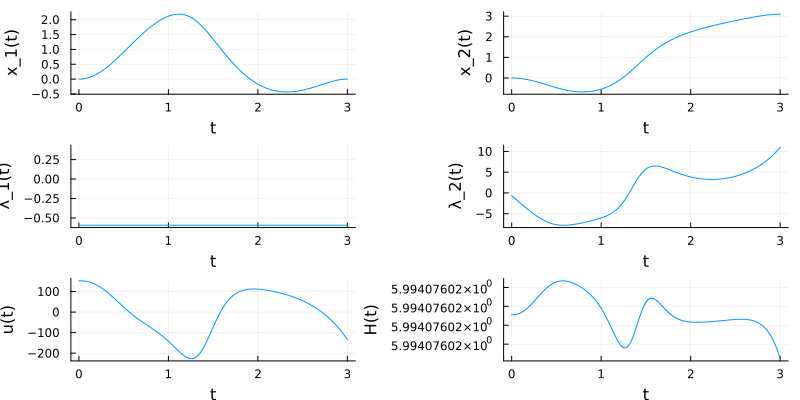

In [ ]:
p1_num = plot(t, u_num,  xlabel = "t", ylabel = "u(t)",   legend = false, fmt = :png, linetype=:steppre)  
p2_num = plot(t, x[1,:], xlabel = "t", ylabel = "x_1(t)", legend = false, fmt = :png, linetype=:steppre)  
p3_num = plot(t, x[2,:], xlabel = "t", ylabel = "x_2(t)", legend = false, fmt = :png, linetype=:steppre)  
p4_num = plot(t, λ[1,:], xlabel = "t", ylabel = "λ_1(t)", legend = false, fmt = :png, linetype=:steppre)  
p5_num = plot(t, λ[2,:], xlabel = "t", ylabel = "λ_2(t)", legend = false, fmt = :png, linetype=:steppre)  
p6_num = plot(t, H_num,  xlabel = "t", ylabel = "H(t)",   legend = false, fmt = :png, linetype=:steppre)  


display(plot(p2_num, p3_num, p4_num, p5_num,p1_num,p6_num, layout = (3,2), size=(800,400)))

In [ ]:
X = Dict("state_x" => x[1,:],
                "state_theta" => x[2,:],
                "state_vx" => x[3,:],
                "state_vtheta" => x[4,:],
                "costate_x" => λ[1,:],
                "costate_theta" => λ[2,:],
                "costate_vx" => λ[3,:],
                "costate_vtheta" => λ[4,:],
                "time" => t,
                "Hamiltonian" => H_num, 
                "control" => u_num)

store("./data/pendulum_inversion/reference/reference_indirect.pkl", X)